# **`Importing relevant Libraries`**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools

import warnings
import sys
if not sys.warnoptions:
    warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv('liver_cirrhosis.csv')

In [3]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


In [4]:
#Finding the number of rows and columns in the dataset

print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 25000
Number of columns: 19


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

From the above information we can notice that there are 7 columns having object data type namely, Status, Drug, Sex, Ascites, Hepatomegaly, Spiders, Edema. There are 3 columns (N_days, Age, Stage) having integer datatype and 9 columns having floating data type (Bilirubin, Cholesterol, Albumin, Copper, Alk_Phos, SGOT, Tryglicerides,Platelets,Prothrombin).

There are no null values in the data.

## Summary Statistics

We summarise only the descriptive statistical measures of the 11 features namely,'N_Days','Age','Bilirubin',	'Cholesterol', 'Albumin', 'Copper',	'Alk_Phos',	'SGOT',	'Tryglicerides', 'Platelets', 'Prothrombin' because all the other features have categorical data. 

In [6]:
df[['N_Days','Age','Bilirubin',	'Cholesterol', 'Albumin', 'Copper',	'Alk_Phos',	'SGOT',	'Tryglicerides', 'Platelets', 'Prothrombin']].describe().T

,count,mean,std,min,25%,50%,75%,max
N_Days,25000.0,1887.117040,1091.690918,41.00,1080.00,1680.000000,2576.000000,4795.00
Age,25000.0,18495.877080,3737.596616,9598.00,15694.00,18499.000000,20955.000000,28650.00
Bilirubin,25000.0,3.402644,4.707491,0.30,0.80,1.300000,3.400000,28.00
Cholesterol,25000.0,372.331471,193.668452,120.00,275.00,369.510563,369.510563,1775.00
Albumin,25000.0,3.486578,0.380488,1.96,3.29,3.510000,3.750000,4.64
Copper,25000.0,100.184663,73.184840,4.00,52.00,97.648387,107.000000,588.00
Alk_Phos,25000.0,1995.675597,1798.885660,289.00,1032.00,1828.000000,1982.655769,13862.40
SGOT,25000.0,123.166345,47.747616,26.35,92.00,122.556346,134.850000,457.25
Tryglicerides,25000.0,123.822548,52.786350,33.00,92.00,124.702128,127.000000,598.00
Platelets,25000.0,256.007337,98.679006,62.00,189.00,251.000000,311.000000,721.00


In [7]:
#checking for the column names
df.columns

Index(['N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly',
       'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage'],
      dtype='object')

In [8]:
#Checking for Duplicated data
df.duplicated().sum()

15361

In [9]:
df.drop_duplicates(inplace=True)

The values in Age column are given in days, so we convert them into years, since it will be convenient for us to tackle them. \
We also convert the values in column N_Days into years and store them in a new column N_Years for the same reason. \
We drop the column N_Days.

In [10]:
df['Age']=round(df['Age']/365)
df['N_Years'] = round(df['N_Days']/365)
df.drop(['N_Days'],axis=1,inplace=True)

We can see that there are no duplicates datas. Now we proceed with the Exploratory Data Analysis.

# **`Exploratory Data Analysis`**

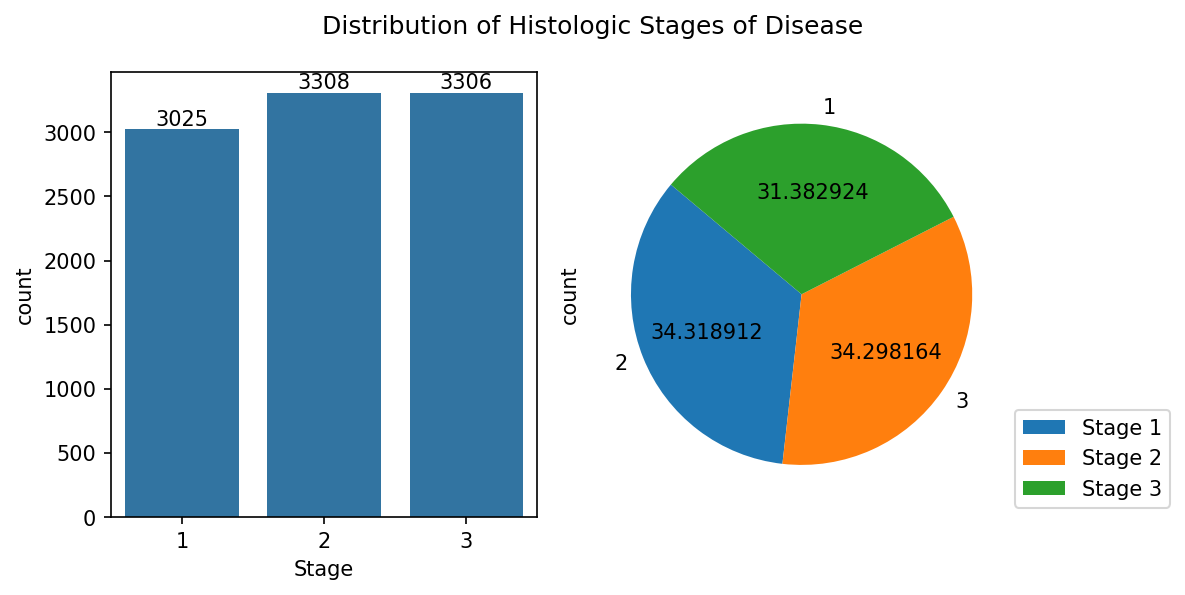

In [11]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Histologic Stages of Disease')

a= sns.countplot(data=df,x='Stage',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Stage'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,ax=axes[1])
axes[1].legend(['Stage 1', 'Stage 2','Stage 3'],loc=(1,0))

fig.tight_layout();

We can see that the target variable Stage has uniform proportion of distribution throughout the three classes. So the dataset is not so imbalanced. That is we can work with this data, there is no need for balancing.

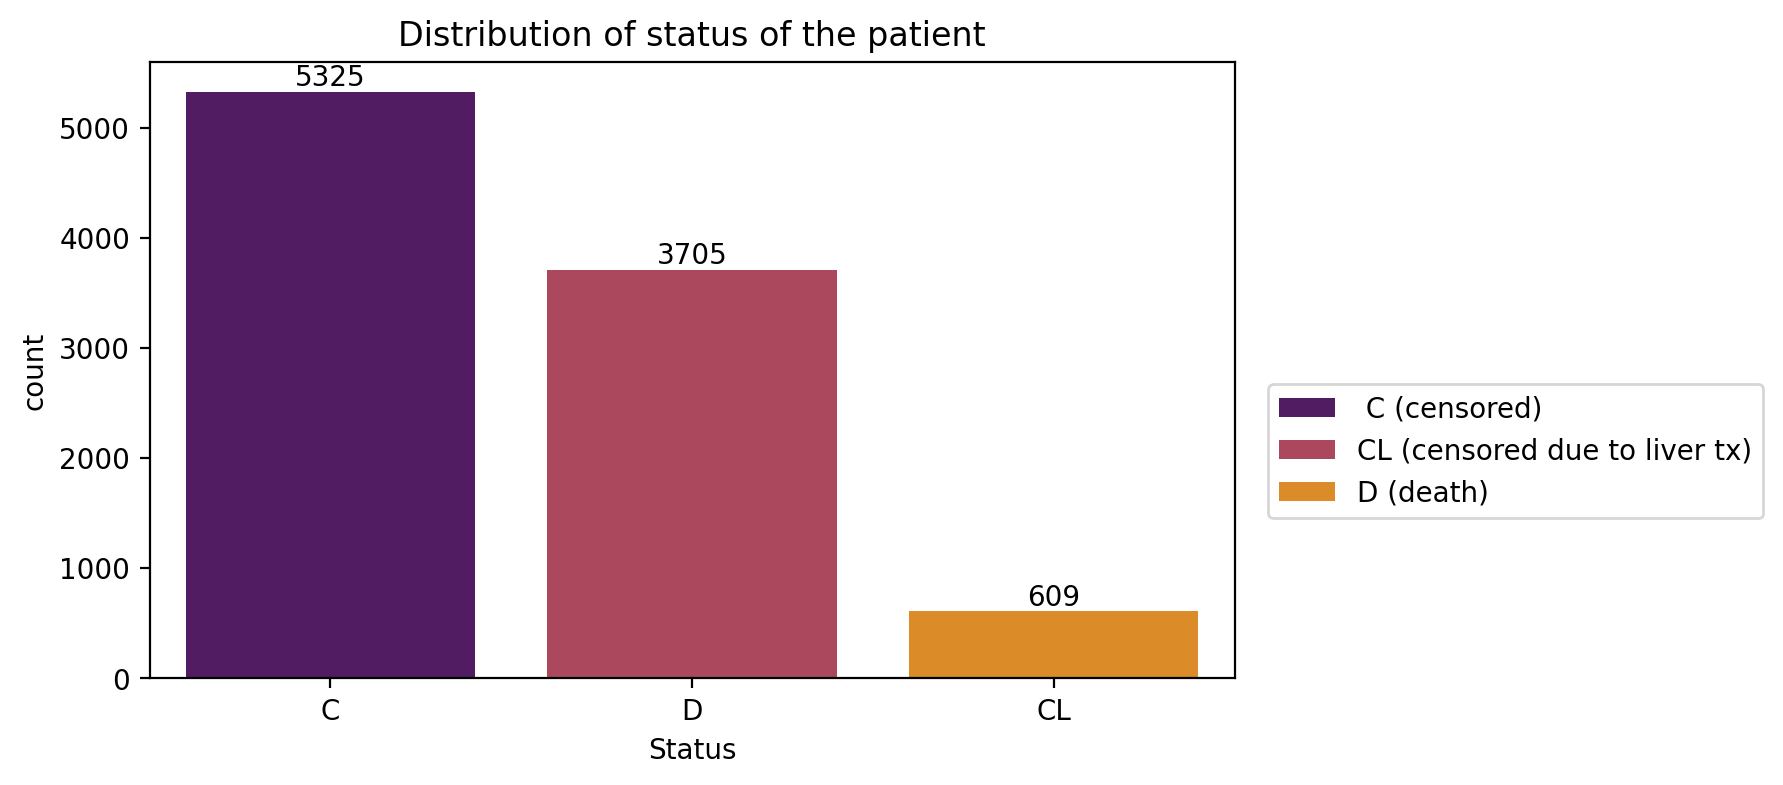

In [12]:
plt.figure(figsize=(7,4),dpi=200)
ax=sns.countplot(data=df,x="Status",palette="inferno")
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of status of the patient')
plt.legend([' C (censored)', 'CL (censored due to liver tx)', 'D (death)'],bbox_to_anchor=(1.5, 0.5));

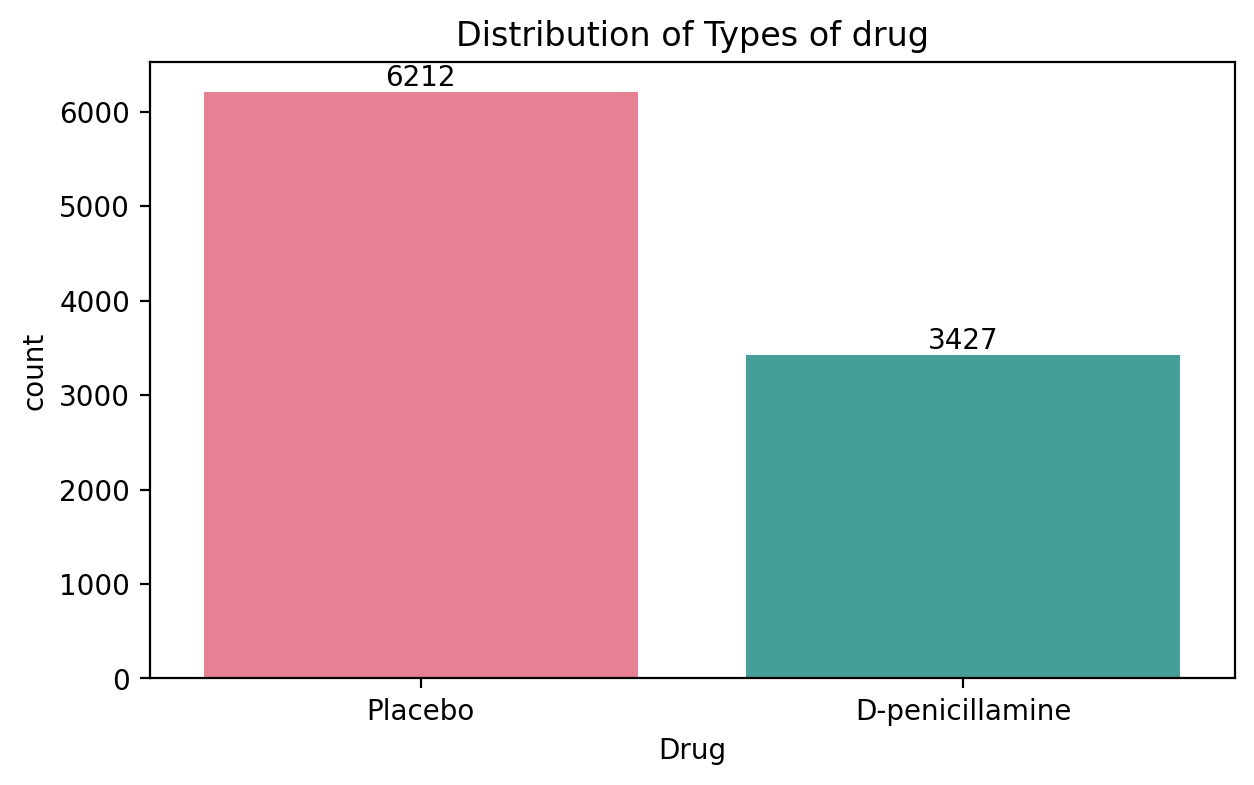

In [13]:
plt.figure(figsize=(7,4),dpi=200)
ax=sns.countplot(data=df,x="Drug",palette='husl')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Types of drug');

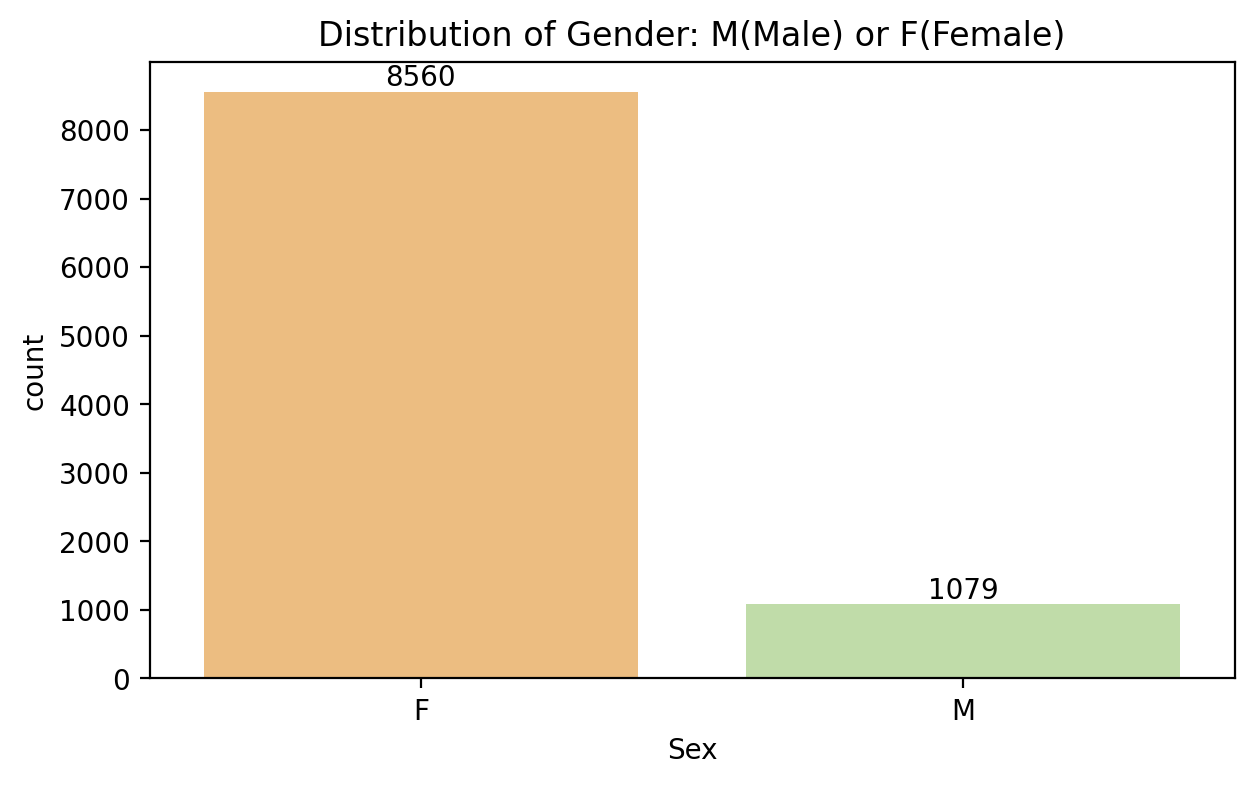

In [14]:
plt.figure(figsize=(7,4),dpi=200)
ax=sns.countplot(data=df,x="Sex",palette='Spectral')
for i in ax.containers:
    ax.bar_label(i,)
plt.title('Distribution of Gender: M(Male) or F(Female)');

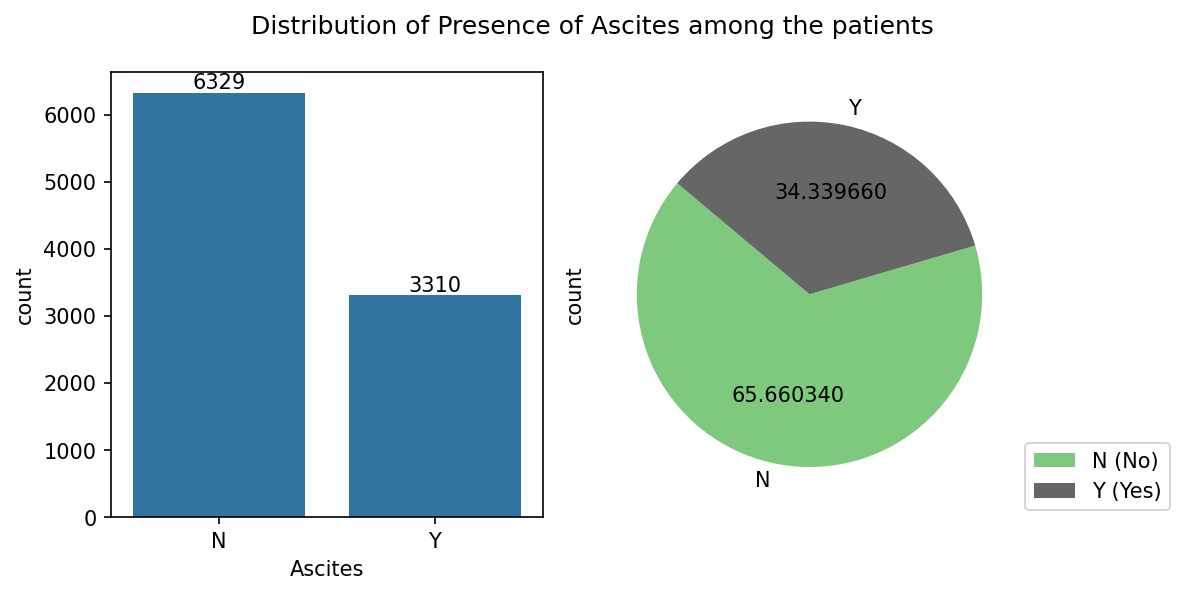

In [15]:

fig, axes = plt.subplots(1,2,figsize=(8,4),dpi=150)

fig.suptitle('Distribution of Presence of Ascites among the patients')

a =sns.countplot(data=df,x='Ascites',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)

df['Ascites'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Accent',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],loc=(1,0))

fig.tight_layout();

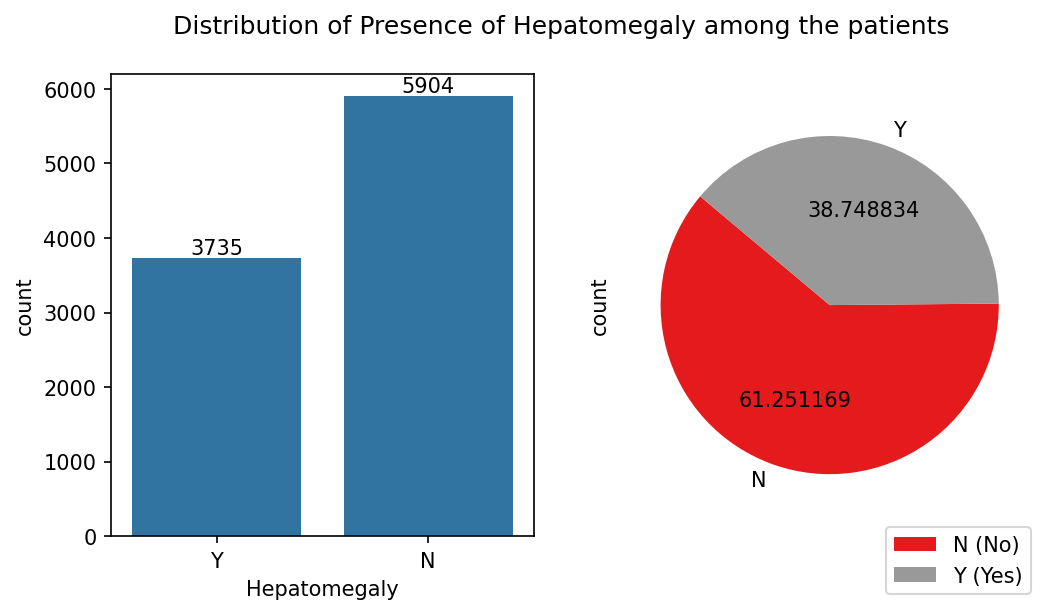

In [16]:
fig,axes = plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Presence of Hepatomegaly among the patients')

a = sns.countplot(data=df,x='Hepatomegaly',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Hepatomegaly'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Set1',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

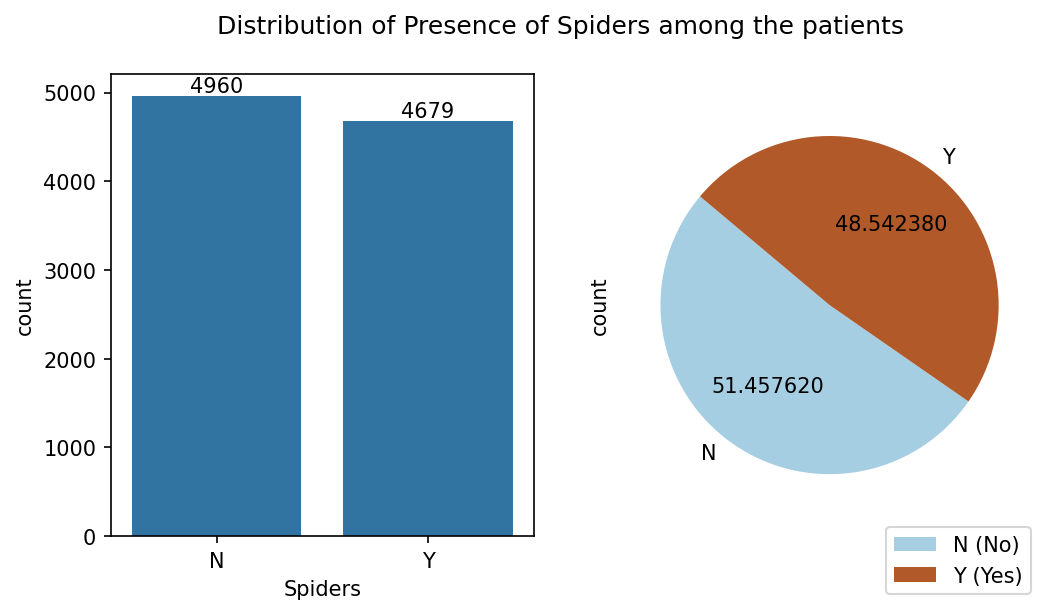

In [17]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Presence of Spiders among the patients');

a= sns.countplot(data=df,x='Spiders',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Spiders'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Paired',ax=axes[1])
axes[1].legend(['N (No)', 'Y (Yes)'],bbox_to_anchor=(1, 0));

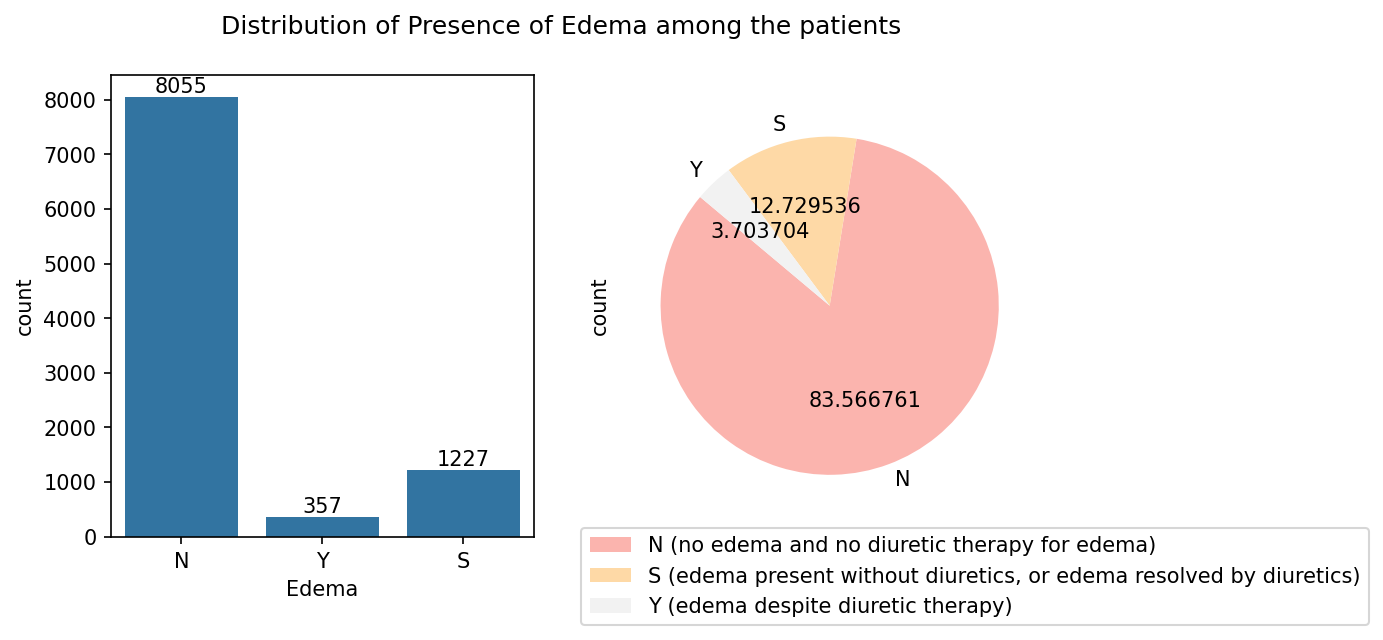

In [18]:
fig,axes=plt.subplots(1,2,figsize=(8,4),dpi=150)
fig.suptitle('Distribution of Presence of Edema among the patients');

a= sns.countplot(data=df,x='Edema',ax=axes[0])
for i in a.containers:
    a.bar_label(i,)
df['Edema'].value_counts().plot(kind='pie',autopct='%2f',startangle=140,cmap='Pastel1',ax=axes[1])
axes[1].legend(['N (no edema and no diuretic therapy for edema)', 'S (edema present without diuretics, or edema resolved by diuretics)', 'Y (edema despite diuretic therapy)'],bbox_to_anchor=(1.8, 0));

In [19]:
#plt.figure(figsize=(12,12),dpi=150)
#sns.pairplot(df[['Stage', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']],hue='Stage',palette='viridis');

The pairplot does not show any correlation between the features properly, so we try to study the features individually.

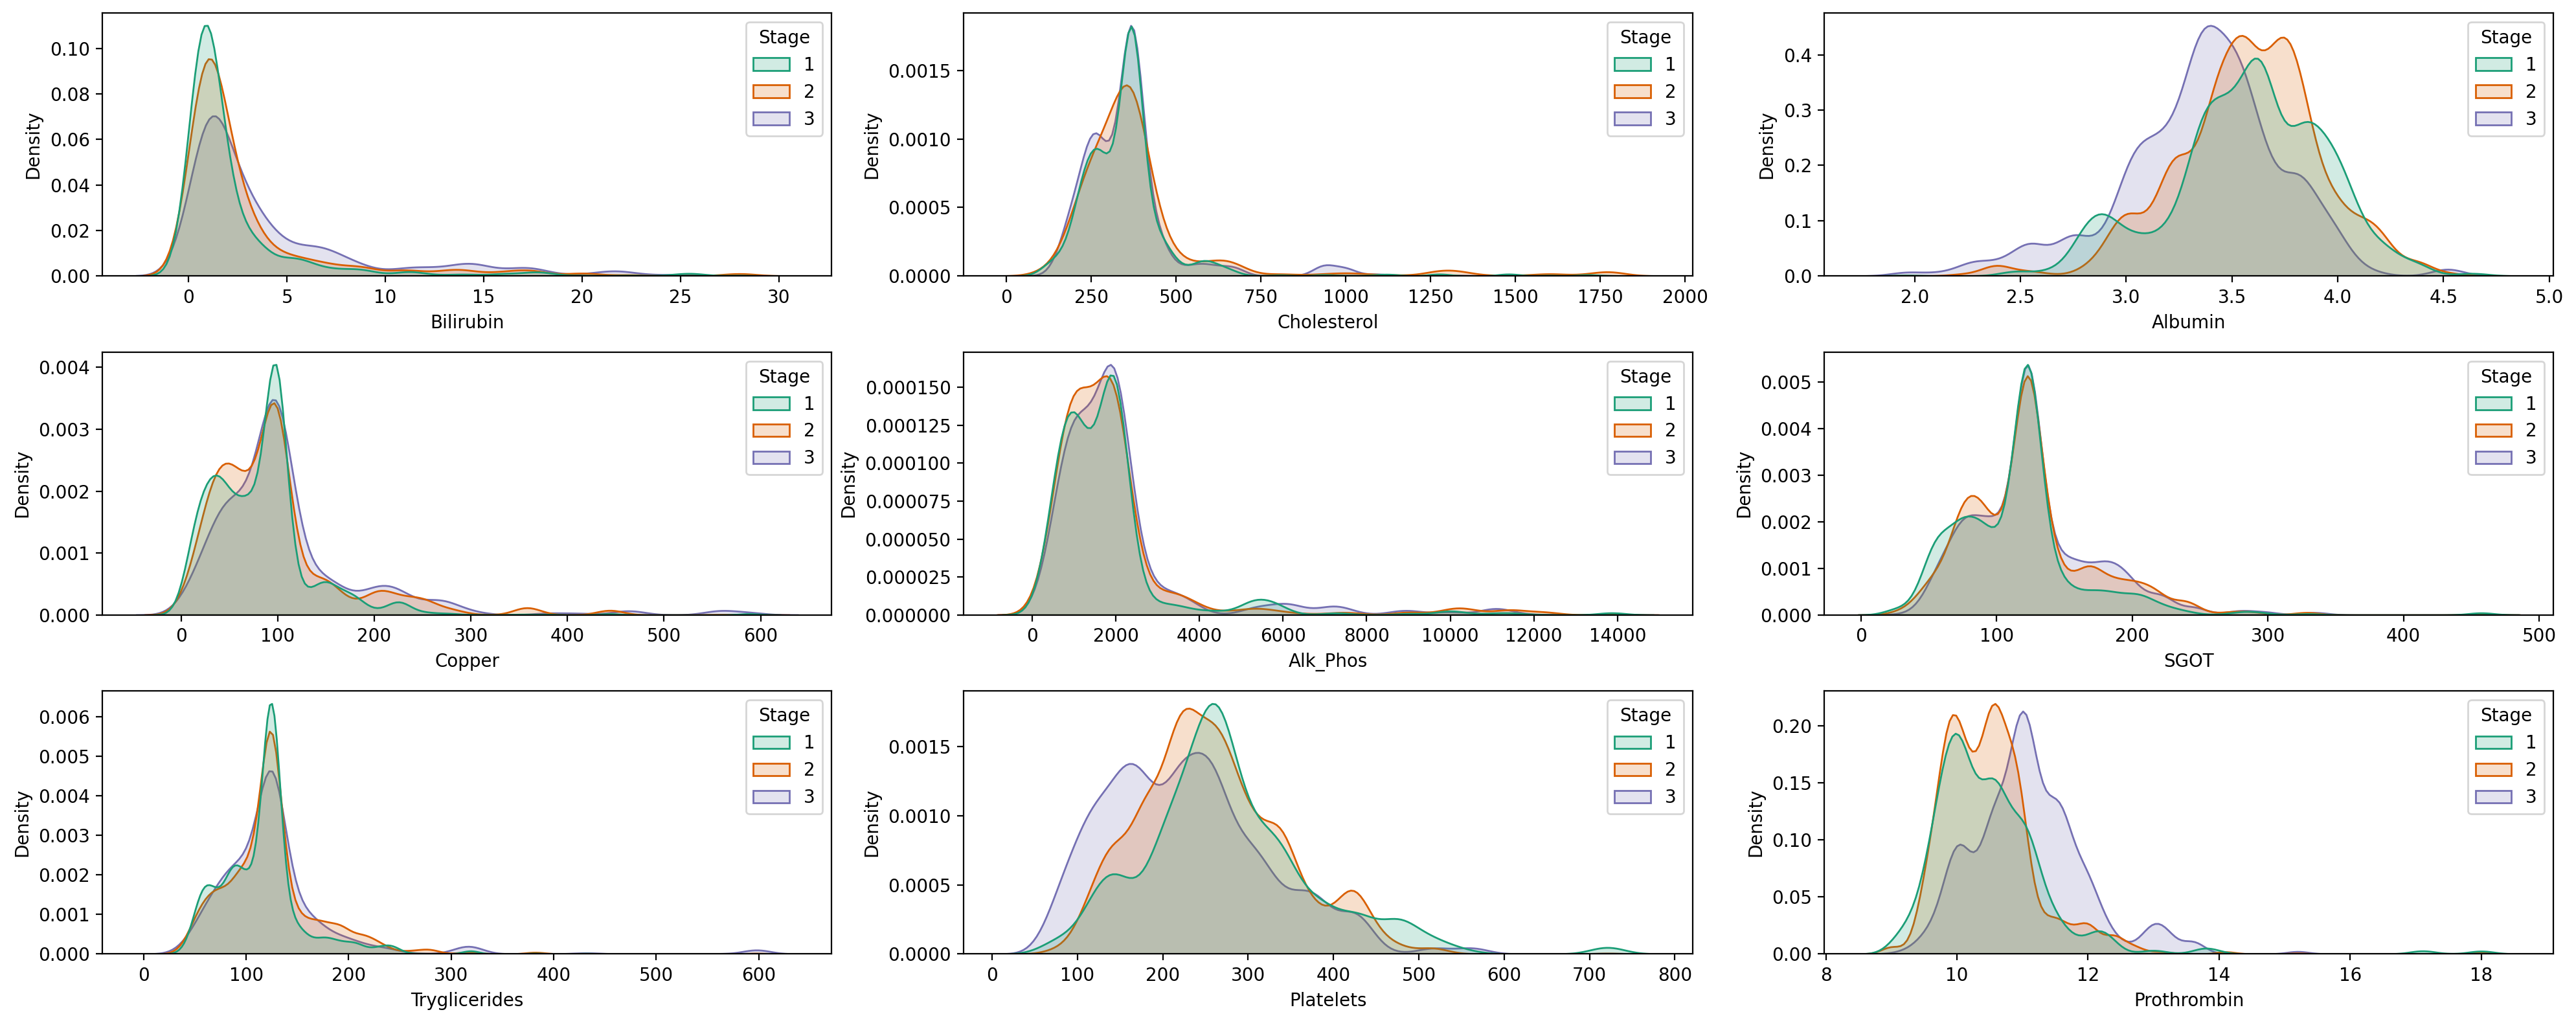

In [20]:
plt.figure(figsize=(20,8),dpi=200)

plt.subplot(3,3,1)
sns.kdeplot(data=df,x='Bilirubin',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,2)
sns.kdeplot(data=df,x='Cholesterol',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,3)
sns.kdeplot(data=df,x='Albumin',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,4)
sns.kdeplot(data=df,x='Copper',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,5)
sns.kdeplot(data=df,x='Alk_Phos',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,6)
sns.kdeplot(data=df,x='SGOT',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,7)
sns.kdeplot(data=df,x='Tryglicerides',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,8)
sns.kdeplot(data=df,x='Platelets',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')
plt.subplot(3,3,9)
sns.kdeplot(data=df,x='Prothrombin',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2')

plt.tight_layout();

In [21]:
df[[ 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']].skew()

Bilirubin        2.739227
Cholesterol      3.986612
Albumin         -0.500259
Copper           2.727683
Alk_Phos         3.502361
SGOT             1.462575
Tryglicerides    3.531199
Platelets        0.743684
Prothrombin      2.193244
dtype: float64

**Takeaways:**
- Albumin is slightly negatively skewed.
- All the other features have high positive skewness.
    

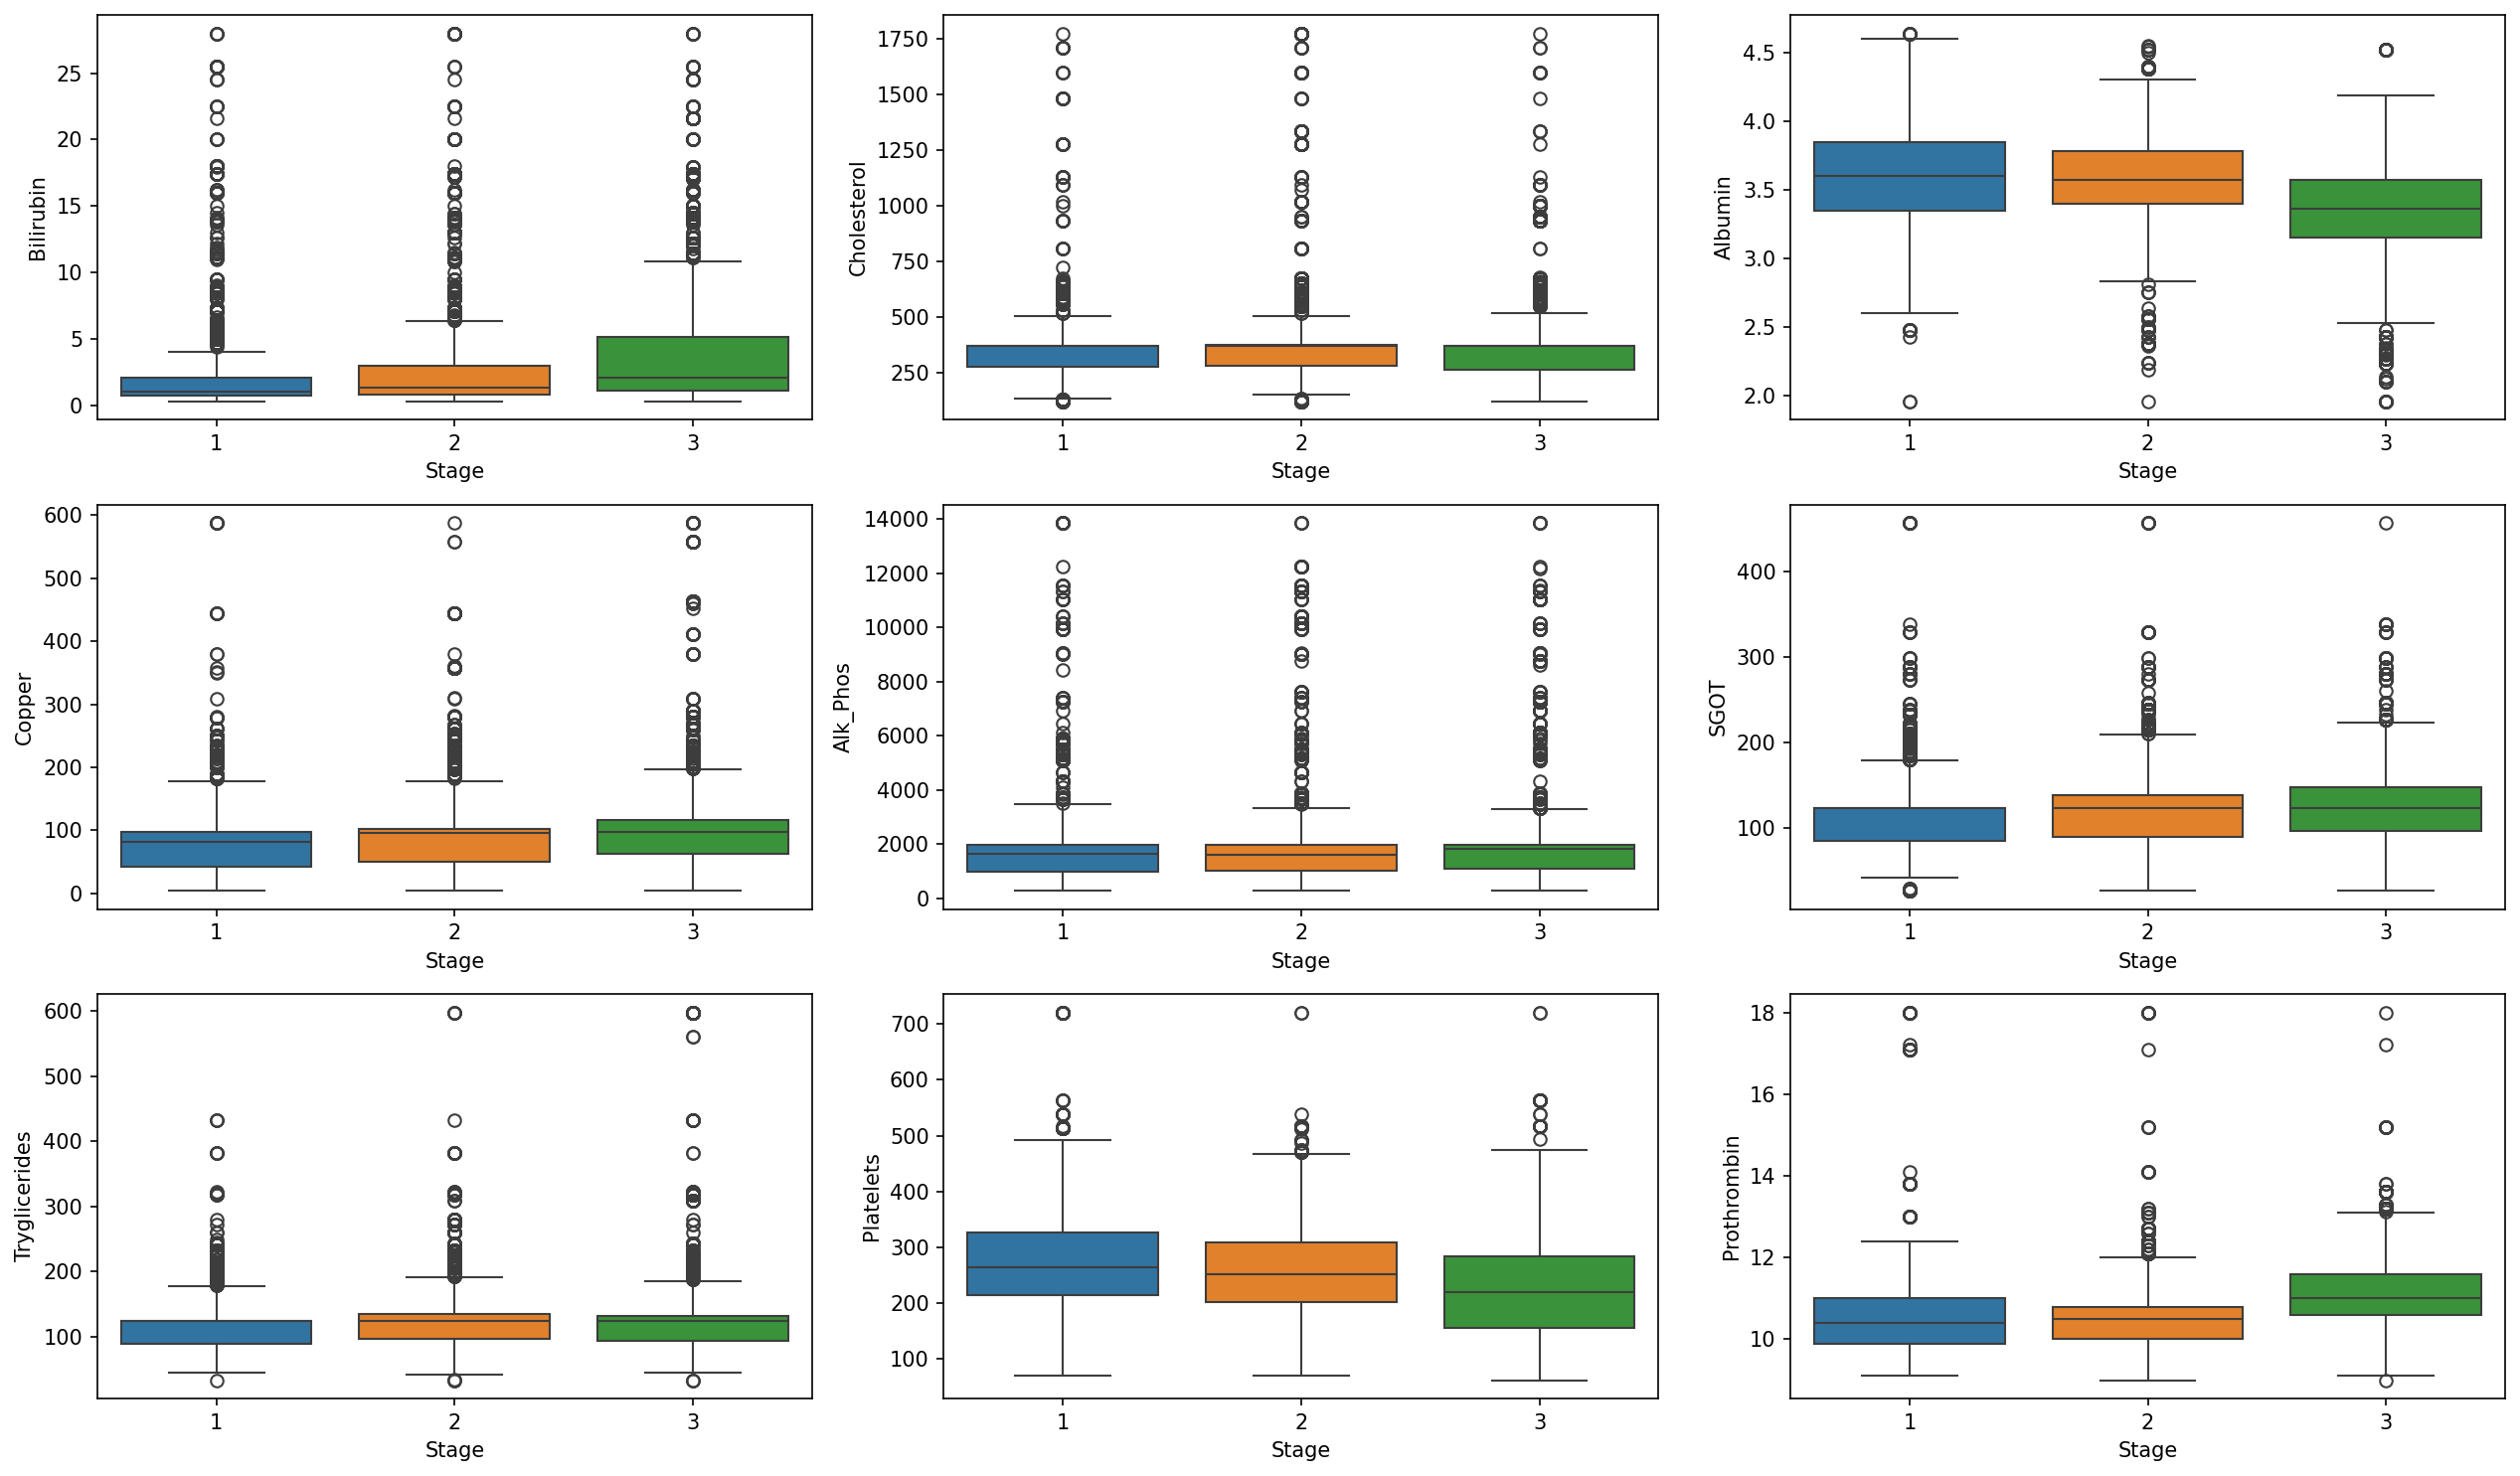

In [22]:
plt.figure(figsize=(17,10),dpi=150)

plt.subplot(3,3,1)
sns.boxplot(data=df,x='Stage',y='Bilirubin',palette='tab10')
plt.subplot(3,3,2)
sns.boxplot(data=df,x='Stage',y='Cholesterol',palette='tab10')
plt.subplot(3,3,3)
sns.boxplot(data=df,x='Stage',y='Albumin',palette='tab10')
plt.subplot(3,3,4)
sns.boxplot(data=df,x='Stage',y='Copper',palette='tab10')
plt.subplot(3,3,5)
sns.boxplot(data=df,x='Stage',y='Alk_Phos',palette='tab10')
plt.subplot(3,3,6)
sns.boxplot(data=df,x='Stage',y='SGOT',palette='tab10')
plt.subplot(3,3,7)
sns.boxplot(data=df,x='Stage',y='Tryglicerides',palette='tab10')
plt.subplot(3,3,8)
sns.boxplot(data=df,x='Stage',y='Platelets',palette='tab10')
plt.subplot(3,3,9)
sns.boxplot(data=df,x='Stage',y='Prothrombin',palette='tab10')

plt.tight_layout();

**Takeaways:**
- *Bilirubin* -
    - The amount of bilirubin in Stage 3 patients is between 0-11 mg/dl.
    - The amount of bilirubin in Stage 2 patients is between 0-5 mg/dl.
    - Stage 2 patients have a bilirubin amount less than 5 mg/dl.
    - Stage 3 has comparatively less outliers than Stage 2 and 1.
- *Cholesterol* - 
    -  The cholesterol level for the three stages is similar. The level lies between 100-500 mg/dl.
- *Albumin* -
    - Stage 3 has less Albumin amount ranging from 2.5 - 4.25 gm/dl than Stage 2 and Stage 1.
    - Stage 1 has the least number of outliers.
- *Platelets* -
    - All the stages have similar range of platelets (less than 500)
    - Majority of patients in Stage 3 have comparatively lesser number of platelets than stage 1 and 2.
- *Prothrombin* -
    - Stage 3 have a higher level of prothrombin compared to the other two stages.
    
     

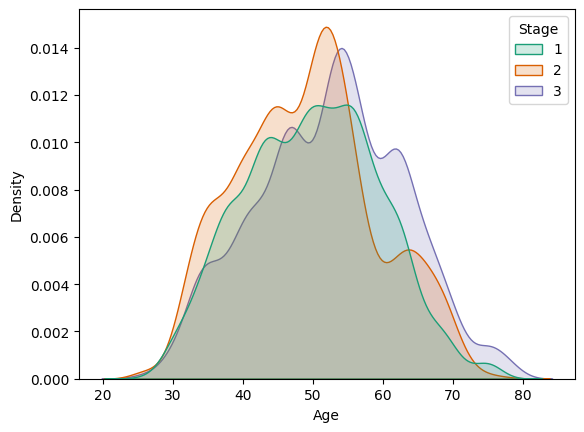

In [23]:
sns.kdeplot(data=df,x='Age',hue='Stage',alpha=.2, linewidth=1, fill=True,palette='Dark2');

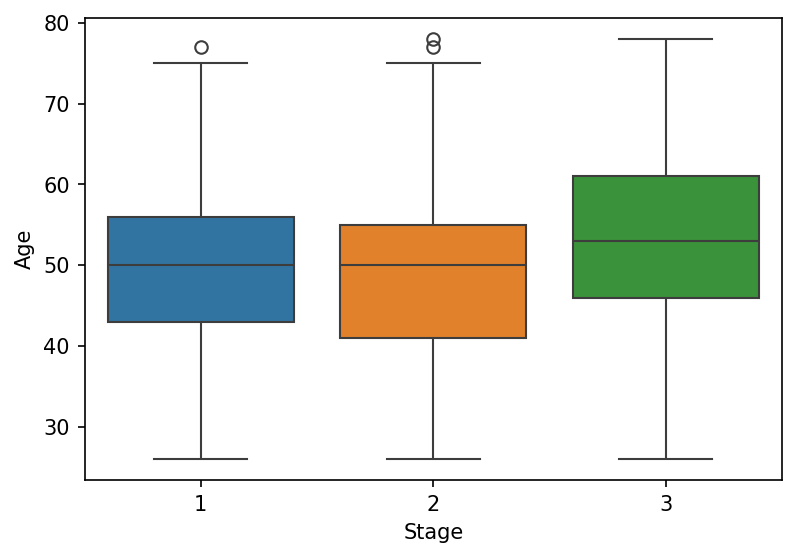

In [24]:
plt.figure(figsize=(6,4),dpi=150)
sns.boxplot(data=df,x='Stage',y='Age',palette='tab10');

**Takeaways** -
- Patients in the range of 46-61 years are more prone to have Stage 3 liver Cirrhosis.
- Patients in the range of 40-55 years are more prone to have Stage 3 liver Cirrhosis.
- Patients in the range of 43-57 years are more prone to have Stage 3 liver Cirrhosis 
- There are 2 outliers in Stage 2 and 1 outlier in Stage 1.

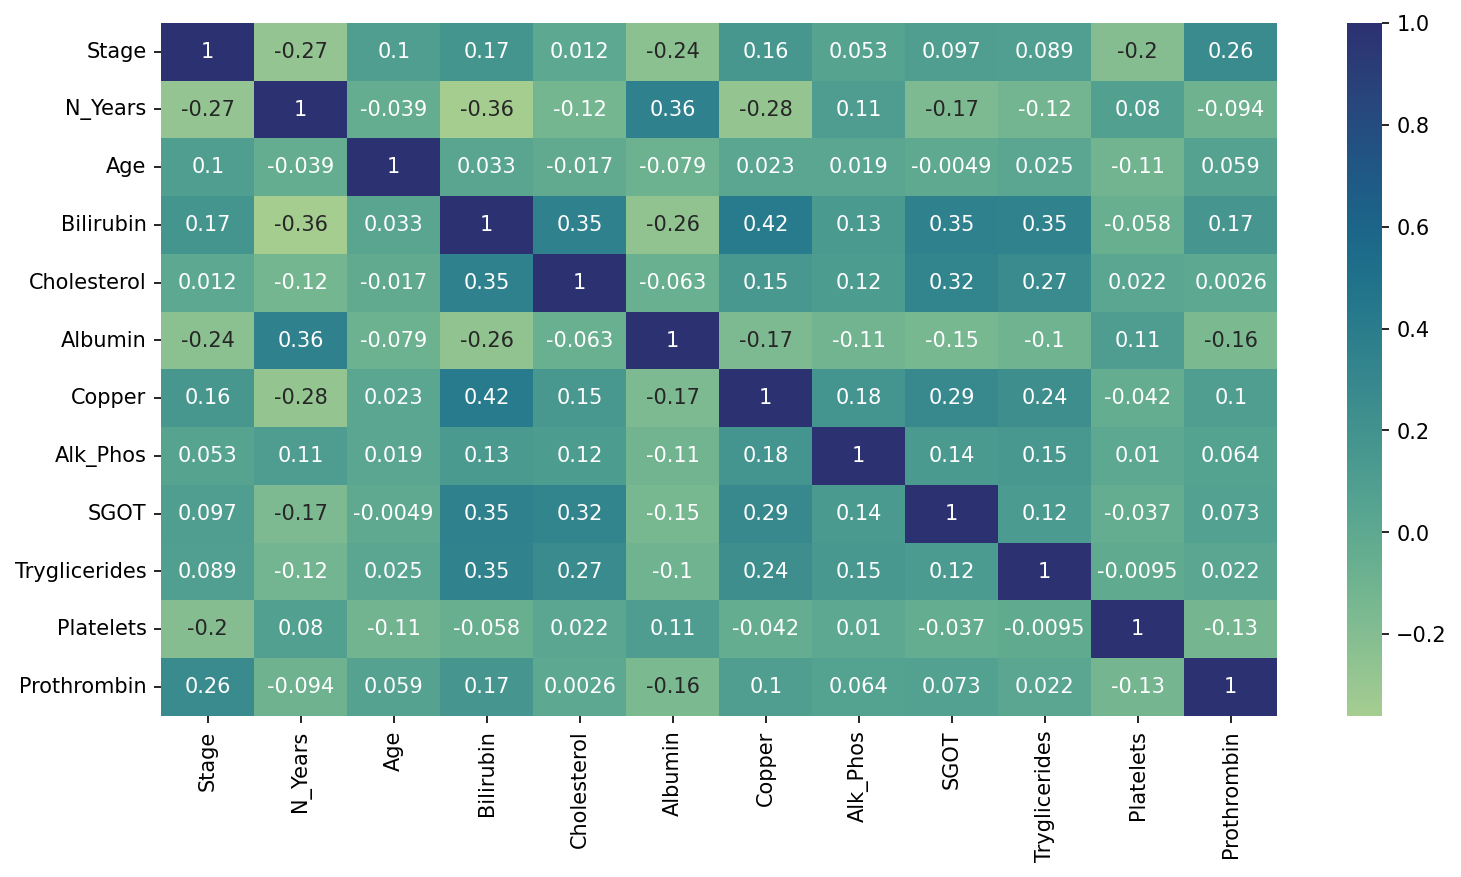

In [25]:
plt.figure(figsize=(12,6),dpi=150)
sns.heatmap(df[['Stage','N_Years', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',	'Alk_Phos',	'SGOT',	'Tryglicerides', 'Platelets', 'Prothrombin']].corr(),annot=True,cmap='crest');

**Takeaways**:
- Stage has some positive correlation with Prothrombin (0.32), and Bilirubin (0.22). This means that as Stage increases from 1 to 3, these factors increase.
- Stage has some negative correlation with Platelets (-0.21), Albumin (-0.24) and N_years (-0.27).This means that as Stage decreases from 3 to 1, these factors decrease.
- N_Years have a positive correlation of 0.36 with Albumin. This means that as there is a increase in between registration and the earlier of death, transplantation, or study analysis time, there is a increase in the rate of Albumin.
- Bilirubin and Copper has a positive correlation of 0.49, so as Bilrubin increases there is a change in the rate of copper.
- SGOT and Bilirubin has a positve correlation of 0.42.
- Triglycerides and Cholesterol has a positive correlation of 0.42.

# **`Data Preparation`**

In order to work with the data, we need to make some changes with the categorical features. We convert the categories into integer values so that we cake make use of them while modelling.

In [26]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
categ = ['Status','Drug', 'Sex', 'Ascites',	'Hepatomegaly',	'Spiders',	'Edema']
df[categ] = df[categ].apply(LE.fit_transform)

### Checking for Outliers

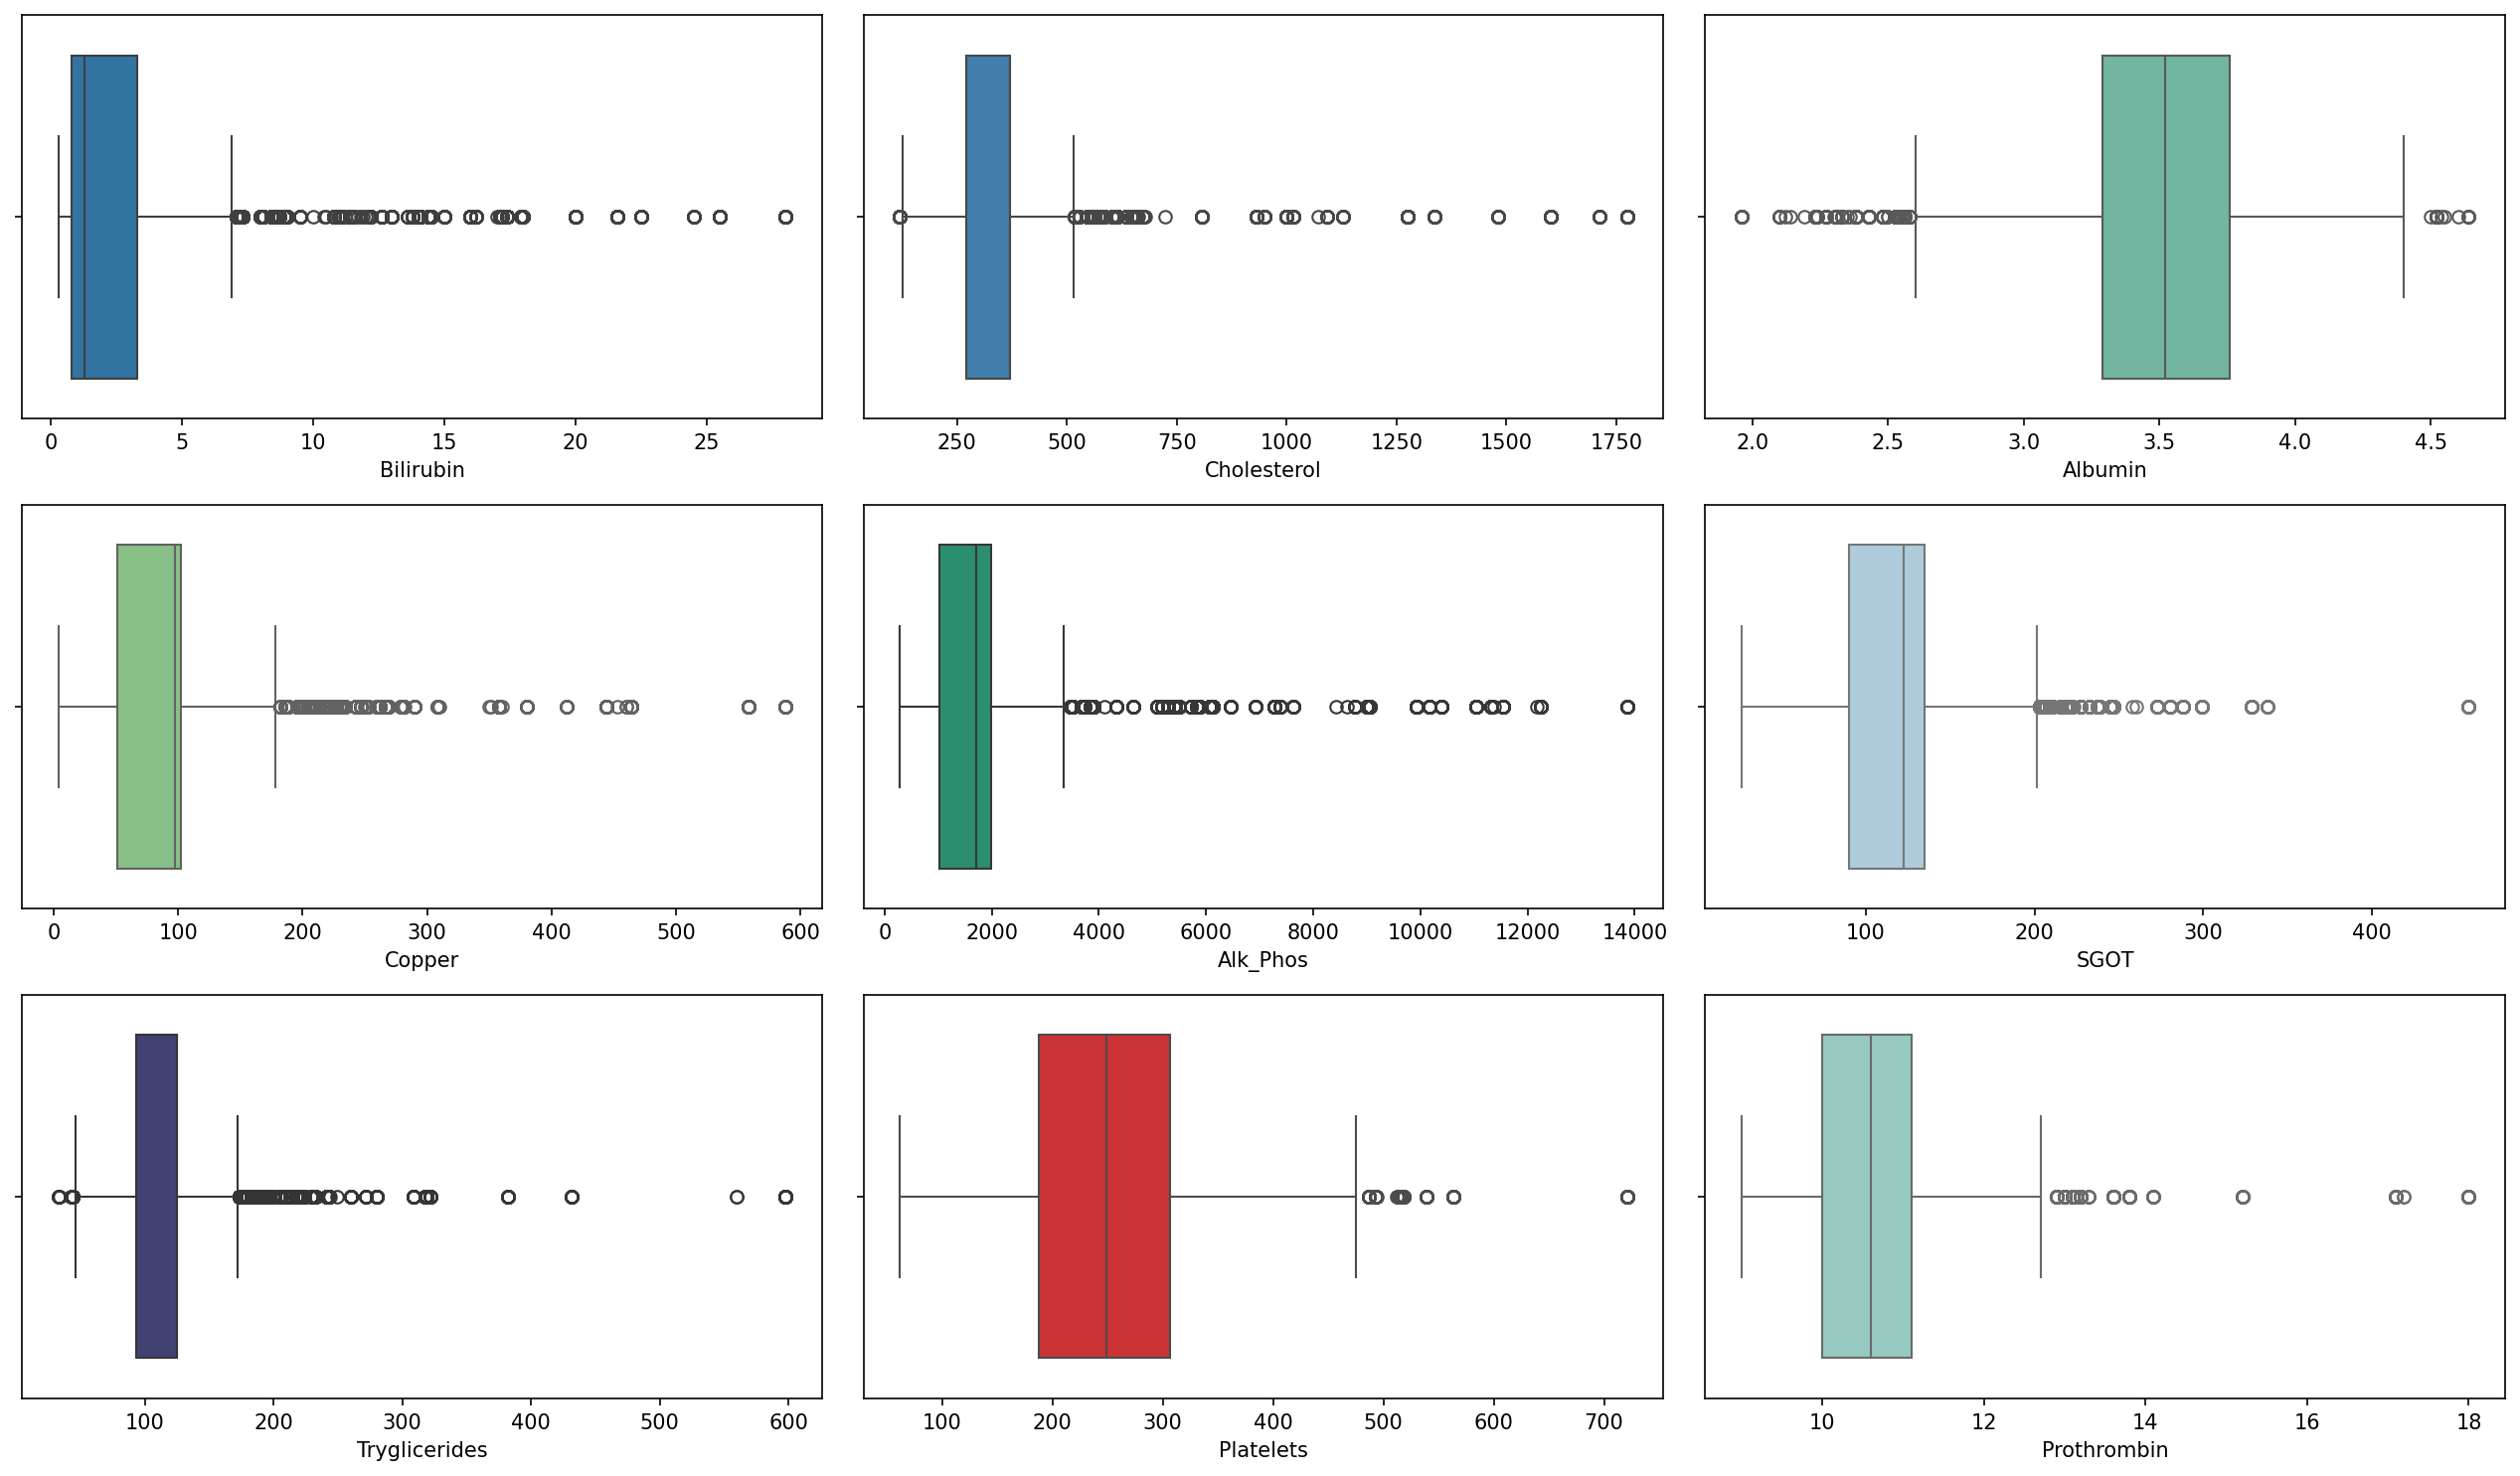

In [27]:
plt.figure(figsize=(17,10),dpi=150)

plt.subplot(3,3,1)
sns.boxplot(data=df,x='Bilirubin',palette='tab10')
plt.subplot(3,3,2)
sns.boxplot(data=df,x='Cholesterol',palette='tab20c')
plt.subplot(3,3,3)
sns.boxplot(data=df,x='Albumin',palette='Set2')
plt.subplot(3,3,4)
sns.boxplot(data=df,x='Copper',palette='Accent')
plt.subplot(3,3,5)
sns.boxplot(data=df,x='Alk_Phos',palette='Dark2')
plt.subplot(3,3,6)
sns.boxplot(data=df,x='SGOT',palette='Paired')
plt.subplot(3,3,7)
sns.boxplot(data=df,x='Tryglicerides',palette='tab20b')
plt.subplot(3,3,8)
sns.boxplot(data=df,x='Platelets',palette='Set1')
plt.subplot(3,3,9)
sns.boxplot(data=df,x='Prothrombin',palette='Set3')

plt.tight_layout();

First we will eliminate the outliers.

### Outlier Capping using IQR method

In [28]:
def outlier(a):
    Q1 = a.quantile(0.25)
    Q3 = a.quantile(0.75)
    IQR = Q3-Q1
    L = Q1 - 1.5*IQR
    U = Q3 + 1.5*IQR
    return(L,U)

In [29]:
def cap(a):
    for i in a:
        df.loc[df[i] >= outlier(df[i])[1],i] = outlier(df[i])[1]
        df.loc[df[i] <= outlier(df[i])[0],i] = outlier(df[i])[0]

In [30]:
num = ['N_Years', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']
cap(num)

In [31]:
x = df.drop(['Stage'],axis=1)
y = df['Stage']

In [32]:
target_names= y.map({1:'Stage 1',2:'Stage 2',3:'Stage 3'})

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **`Model Building`**

## Multiclass Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [37]:
param_log = {'C': np.logspace(0, 4, 10),
             'penalty':['l1','l2']}
log_model = LogisticRegression(multi_class='ovr')
gs_log_model = GridSearchCV(log_model,param_grid=param_log,cv=3)
gs_log_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(multi_class='ovr'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [38]:
gs_log_model.best_params_

{'C': 21.544346900318832, 'penalty': 'l2'}

Fitting a Logistic Regression with the best parameters

In [39]:
log_model = LogisticRegression(C= 21.544346900318832,penalty='l2')

In [40]:
log_model.fit(X_train,y_train)
lg_preds= log_model.predict(X_test)

## Support Vector Machines(SVC)

In [ ]:
from sklearn.svm import SVC
param_svc = {'kernel':['linear','rbf'],'C':[0.01,0.1,1]}
svc = SVC()
gs_svc_model = GridSearchCV(svc,param_grid=param_svc,cv=3)
gs_svc_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1], 'kernel': ['linear', 'rbf']})

In [ ]:
gs_svc_model.best_params_

{'C': 1, 'kernel': 'rbf'}

Fitting Support Vector Classifier with the best parameters

In [ ]:
svc_model = SVC(probability=True,C=1,kernel='rbf')
svc_model.fit(X_train_scaled,y_train)

SVC(C=1, probability=True)

In [ ]:
svc_preds = svc_model.predict(X_test_scaled)

## Random Forest Classifier

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [42]:
param_rfc = {'n_estimators': [int(x) for x in np.linspace(start=10,stop=80,num=10)],
             'max_features': ['log2','sqrt',None],
             'max_depth':[2,4,7]}
rfc_model = RandomForestClassifier()
gs_rfc_model = GridSearchCV(estimator=rfc_model,param_grid = param_rfc,cv=3,n_jobs=4,error_score='raise')
gs_rfc_model.fit(X_train,y_train)

GridSearchCV(cv=3, error_score='raise', estimator=RandomForestClassifier(),
             n_jobs=4,
             param_grid={'max_depth': [2, 4, 7],
                         'max_features': ['log2', 'sqrt', None],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]})

In [43]:
gs_rfc_model.best_params_

{'max_depth': 7, 'max_features': None, 'n_estimators': 72}

Fitting Random Forest Classifier with the best parameters

In [68]:
rfc_model = RandomForestClassifier(max_depth=7,max_features=None,n_estimators=72)

In [69]:
rfc_model.fit(X_train,y_train)
rfc_preds = rfc_model.predict(X_test)

## Histogram-based Gradient Boosting Classification

In [50]:
from sklearn.ensemble import HistGradientBoostingClassifier
HG = HistGradientBoostingClassifier()
param_hg = {'learning_rate':[0.01,0.1,1.0],
            'max_iter':[100,150,200]}
gs_hg_model = GridSearchCV(HG,param_grid=param_hg,cv=3,n_jobs=-1)

In [51]:
gs_hg_model.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=HistGradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1.0],
                         'max_iter': [100, 150, 200]})

In [52]:
gs_hg_model.best_params_

{'learning_rate': 0.1, 'max_iter': 200}

Fitting Histogram based Gradient Boosting Classifier with the best parameters

In [53]:
hg_model = HistGradientBoostingClassifier(learning_rate= 0.1, max_iter= 200)
hg_model.fit(X_train,y_train)

HistGradientBoostingClassifier(max_iter=200)

In [54]:
hg_preds = hg_model.predict(X_test)

# **`Feature Importance`**

Feature: 0 - Status, Score: 0.00858
Feature: 1 - Drug, Score: 0.00762
Feature: 2 - Age, Score: 0.05779
Feature: 3 - Sex, Score: 0.00121
Feature: 4 - Ascites, Score: 0.00848
Feature: 5 - Hepatomegaly, Score: 0.10842
Feature: 6 - Spiders, Score: 0.01045
Feature: 7 - Edema, Score: 0.03103
Feature: 8 - Bilirubin, Score: 0.05859
Feature: 9 - Cholesterol, Score: 0.02341
Feature: 10 - Albumin, Score: 0.1369
Feature: 11 - Copper, Score: 0.03865
Feature: 12 - Alk_Phos, Score: 0.0233
Feature: 13 - SGOT, Score: 0.03307
Feature: 14 - Tryglicerides, Score: 0.02057
Feature: 15 - Platelets, Score: 0.09626
Feature: 16 - Prothrombin, Score: 0.24854
Feature: 17 - N_Years, Score: 0.08714


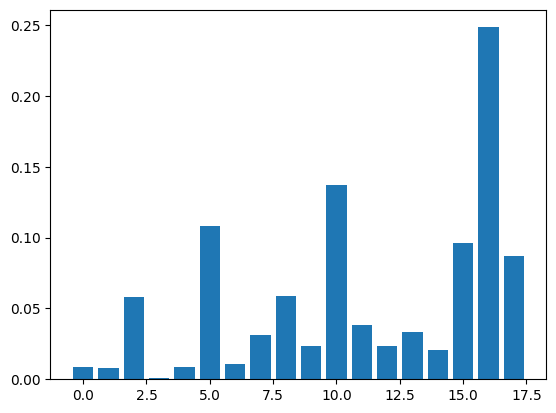

In [55]:
importance = rfc_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print(f'Feature: {i} - {x.columns[i]}, Score: {np.round(v,5)}' )
# plot feature importance
plt.bar([x for x in range(len(importance))], importance);

So we can see that Prothombin, Albumin and Hepatomegaly are the most important features to affect Liver Cirrhosis.

# **`Model Evaluation and Comparison`**

We use metrics such as Accuracy, Precision, Recall and F1 Score to evaluate the models. Later we have plotted the macro averaged OvO AUROC to compare the models.

In [56]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,f1_score,precision_score,recall_score,accuracy_score,classification_report

In [57]:
def report(preds):  
    print(classification_report(preds,y_test))

mod_name = ['Logistic Regression','SVC','Random Forest Classifier','HistGradientBoostingClassifier']
pred = [lg_preds,svc_preds,rfc_preds,hg_preds]
for i in range(0,len(pred)):
    print(f'---------------------- {mod_name[i]} -----------------------------\n')
    report(pred[i])

---------------------- Logistic Regression -----------------------------

              precision    recall  f1-score   support

           1       0.37      0.44      0.40       637
           2       0.40      0.40      0.40       798
           3       0.57      0.49      0.53       975

    accuracy                           0.45      2410
   macro avg       0.44      0.44      0.44      2410
weighted avg       0.46      0.45      0.45      2410

---------------------- SVC -----------------------------

              precision    recall  f1-score   support

           1       0.70      0.72      0.71       752
           2       0.67      0.65      0.66       820
           3       0.79      0.80      0.79       838

    accuracy                           0.72      2410
   macro avg       0.72      0.72      0.72      2410
weighted avg       0.72      0.72      0.72      2410

---------------------- Random Forest Classifier -----------------------------

              precision    

In [58]:
def metric(pred):
    m = [[accuracy_score(y_test,pred),
          precision_score(y_test,pred,average='macro'),
          recall_score(y_test,pred,average='macro'),
          f1_score(y_test,pred,average='macro')]]
    return(m)

In [59]:
data=[metric(lg_preds), metric(svc_preds),metric(rfc_preds),metric(hg_preds)]
mod_name = ['Logistic Regression','SVC','Random Forest Classifier','Histogram-based Gradient Boosting Classifier']
Comparison = pd.DataFrame(np.array(data).reshape(4,4), columns=['Accuracy','Precision','Recall','F1 Score'],index=mod_name)
Comparison

,Accuracy,Precision,Recall,F1 Score
Logistic Regression,0.446058,0.442459,0.442807,0.440519
SVC,0.720332,0.719643,0.718748,0.719123
Random Forest Classifier,0.768880,0.773972,0.767675,0.769059
Histogram-based Gradient Boosting Classifier,0.906639,0.906172,0.905845,0.905976


### Interpretation
1. For Logistic Regression Model-
   - Here the model accuracy is 0.446, i.e., over all predictions, 44.6% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 44% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 44.29% of them.
   - The F1 Score is 0.440519. 
2. For SVM Classifier-
   - Here the model accuracy is 0.720, i.e., over all predictions, 72% of them are correct. 
   - Out of all the loans that was predicted to be approved by the model, only approximately 72% were actually approved. 
   - Out of all the loans that have been actually approved, the model could predict only 72% of them.
   - The F1 Score is 0.773726. 
3.  For Random Forest Classifier-
      - Here the model accuracy is 0.773	, i.e., over all predictions, 77.3% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately 78% were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 77.3% of them.
      - The F1 Score is 0.982. 
4.  For Histogram based Gradient Boosting Classifier-
      - Here the model accuracy is 0.907, i.e., over all predictions, 90.7% of them are correct. 
      - Out of all the loans that was predicted to be approved by the model, only approximately 91% were actually approved. 
      - Out of all the loans that have been actually approved, the model could predict only 90.6% of them.
      - The F1 Score is 0.905976.

## Confusion Matrix

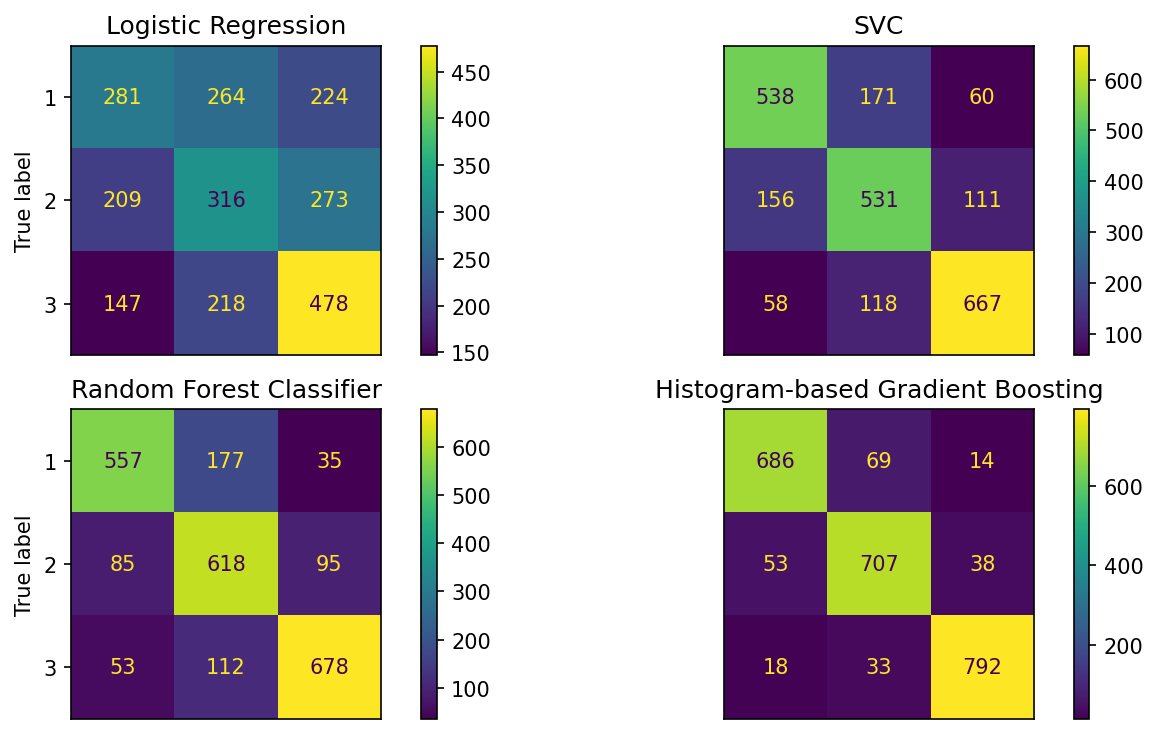

In [60]:
f, axes = plt.subplots(2, 2, figsize=(10,5),dpi=150)

axes[0, 0].set_title("Logistic Regression", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,lg_preds),display_labels=gs_log_model.classes_).plot(ax=axes[0,0])
axes[0, 0].xaxis.set_ticklabels(['', '', ''])
axes[0, 0].set_xlabel('')
axes[0, 0].tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

axes[0, 1].set_title("SVC", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,svc_preds),display_labels=gs_svc_model.classes_).plot(ax=axes[0,1])
axes[0, 1].xaxis.set_ticklabels(['', '', ''])
axes[0, 1].yaxis.set_ticklabels(['', '', ''])
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].tick_params(axis='both', which='both', bottom=False, left=False)

axes[1, 0].set_title("Random Forest Classifier", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,rfc_preds),display_labels=gs_rfc_model.classes_).plot(ax=axes[1,0])
axes[1, 0].xaxis.set_ticklabels(['', '', ''])
axes[1, 0].set_xlabel('')
axes[1, 0].tick_params(axis='x', which='both', bottom=False)

axes[1, 1].set_title("Histogram-based Gradient Boosting", size=12)
ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_test,hg_preds),display_labels=gs_hg_model.classes_).plot(ax=axes[1,1])
axes[1, 1].xaxis.set_ticklabels(['', '', ''])
axes[1, 1].yaxis.set_ticklabels(['', '', ''])
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].tick_params(axis='both', which='both', bottom=False, left=False)

plt.tight_layout();

## ROC AUC 

The ROC curve shows graphically the tradeoff that occurs between trying to maximize the true positive rate vs. trying to minimize the false positive rate. In an ideal situation, we would have sensitivity and specificity near 100% at all cutoffs, meaning we predict perfectly in all cases. In that case, we do not need statistics, because our "success" and "failures" are very easy to tell apart.

We have a balanced dataset, so we are concerned about tehe detailed comparison of class pairs, and need a comprehensive evaluation of the model’s performance across all class distinctions. For this, we use ROC curve using the OvO macro-average.

### OvO macro-averaged ROC

In [61]:
lg_probs = log_model.predict_proba(X_test)
svc_probs= svc_model.predict_proba(X_test)
rfc_probs = rfc_model.predict_proba(X_test)
hg_probs = hg_model.predict_proba(X_test)

In [62]:
from itertools import combinations
from sklearn.metrics import roc_curve,auc,RocCurveDisplay
from sklearn.preprocessing import LabelBinarizer

In [63]:
pair_list = list(combinations(np.unique(y), 2))
label_binarizer = LabelBinarizer().fit(y_train)
fpr_grid = np.linspace(0.0, 1.0, 1000)


def OvOROC(probs,a):
    pair_scores = []
    mean_tpr = dict()

    for ix, (label_a, label_b) in enumerate(pair_list):
        a_mask = y_test == label_a
        b_mask = y_test == label_b
        ab_mask = np.logical_or(a_mask, b_mask)

        a_true = a_mask[ab_mask]
        b_true = b_mask[ab_mask]

        idx_a = np.flatnonzero(label_binarizer.classes_ == label_a)[0]
        idx_b = np.flatnonzero(label_binarizer.classes_ == label_b)[0]

        fpr_a, tpr_a, _ = roc_curve(a_true, probs[ab_mask, idx_a])
        fpr_b, tpr_b, _ = roc_curve(b_true, probs[ab_mask, idx_b])

        mean_tpr[ix] = np.zeros_like(fpr_grid)
        mean_tpr[ix] += np.interp(fpr_grid, fpr_a, tpr_a)
        mean_tpr[ix] += np.interp(fpr_grid, fpr_b, tpr_b)
        mean_tpr[ix] /= 2
        mean_score = auc(fpr_grid, mean_tpr[ix])
        pair_scores.append(mean_score)

        fig, ax = plt.subplots(figsize=(6, 6))
        plt.plot(
            fpr_grid,
            mean_tpr[ix],
            label=f"Mean {label_a} vs {label_b} (AUC = {mean_score :.2f})",
            linestyle=":",
            linewidth=4,
        )
        RocCurveDisplay.from_predictions(
            a_true,
            probs[ab_mask, idx_a],
            ax=ax,
            name=f"{label_a} as positive class",
        )
        RocCurveDisplay.from_predictions(
            b_true,
            probs[ab_mask, idx_b],
            ax=ax,
            name=f"{label_b} as positive class",
            plot_chance_level=True,
        )
        ax.set(
            xlabel="False Positive Rate",
            ylabel="True Positive Rate",
            title=f"{target_names[idx_a]} vs {label_b} ROC curves",
        )

    print(f"Macro-averaged One-vs-One ROC AUC score for {a}: {np.average(pair_scores):.2f}")

#### One-vs-One ROC AUC score for Logistic Regression

Macro-averaged One-vs-One ROC AUC score for LogisticRegression: 0.64


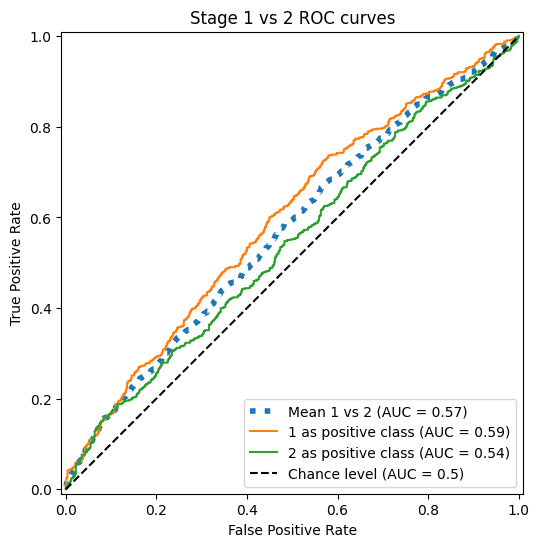

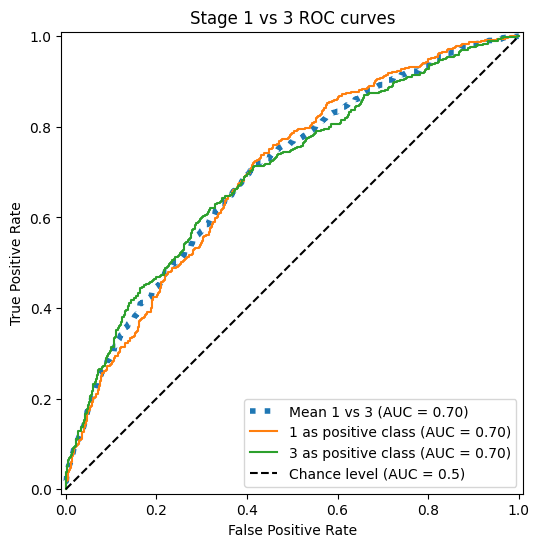

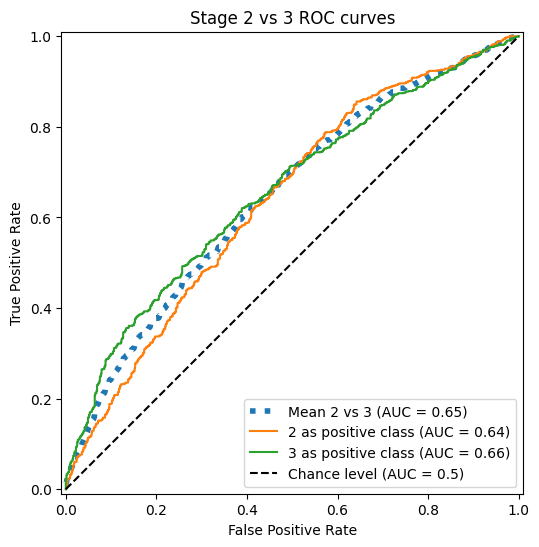

In [64]:
OvOROC(lg_probs,'LogisticRegression')

The model works poorly as it has a macro averaged score OvO AUROC score of 0.64. Thus, it somewhat helps to discriminate the two classes, but only poorly. So we say that the model is poor.

#### One-vs-One ROC AUC score for Support Vector Classifier

Macro-averaged One-vs-One ROC AUC score for Support Vector Classifier: 0.50


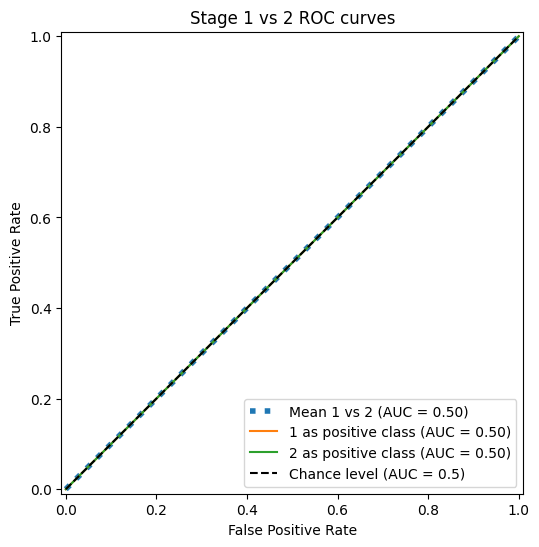

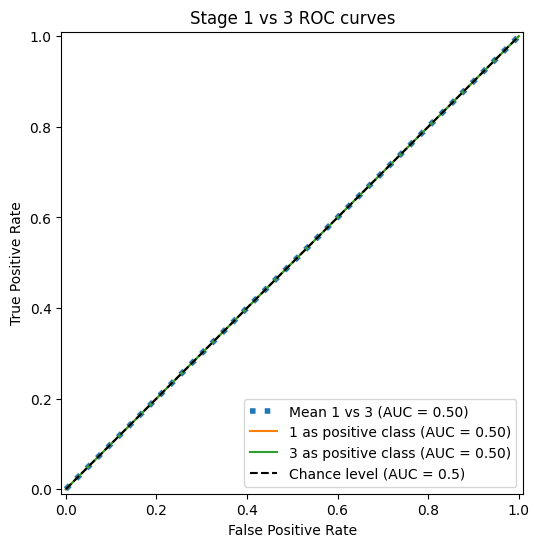

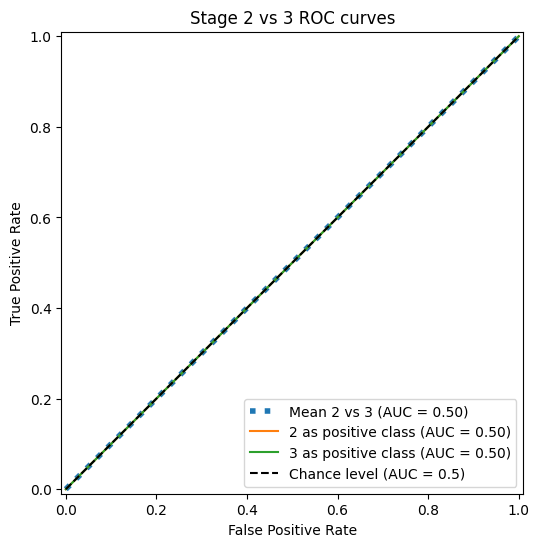

In [65]:
OvOROC(svc_probs,'Support Vector Classifier')

The above situation corresponds to determining the discrimination of the two stages by an accidental method, such as a coin toss, and has no meaning as a significant prediction tool. So, even if the accuracy of the model is high, we discard it as it is a poor model.

#### One-vs-One ROC AUC score for Random Forest Classifier

Macro-averaged One-vs-One ROC AUC score for Random Forest Classifier: 0.91


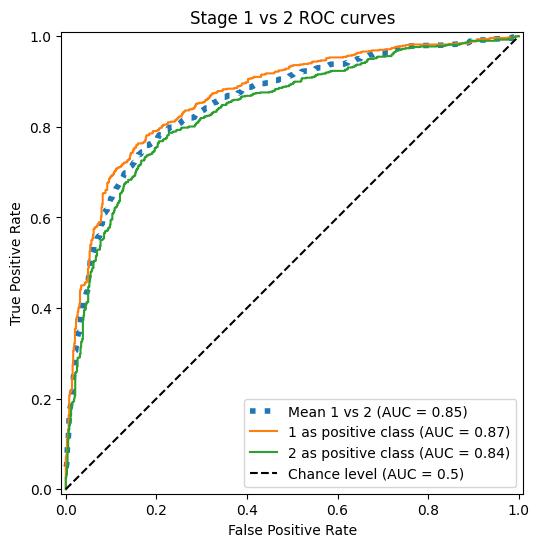

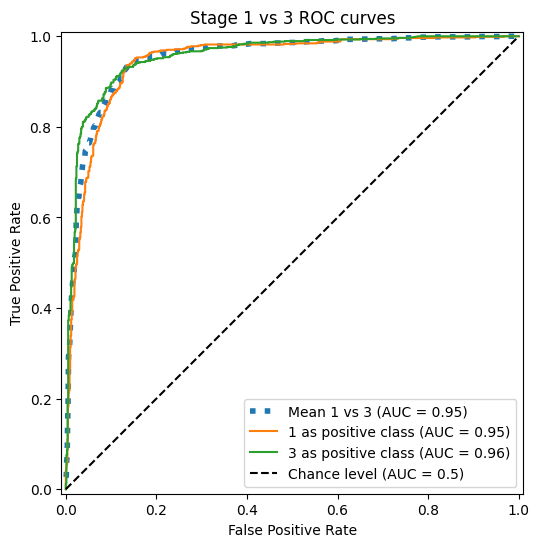

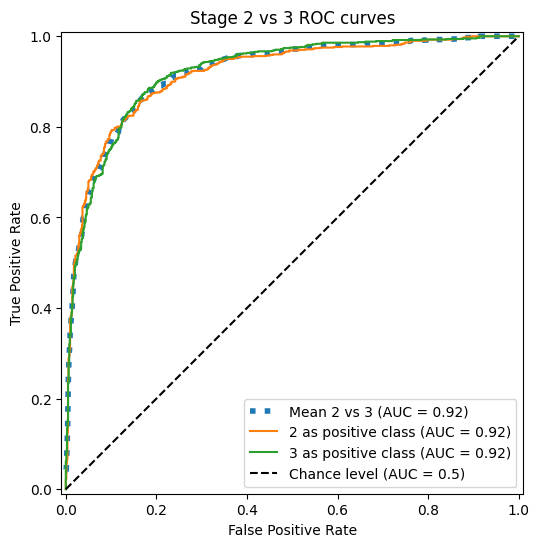

In [66]:
OvOROC(rfc_probs,'Random Forest Classifier')

Random forest yields an excellent macro averaged OvO AUROC score of 0.91, so we can say the model is very good.

#### One-vs-One ROC AUC score for Histogram based Gradient Boosting

Macro-averaged One-vs-One ROC AUC score for Histogram based Gradient Boosting Classifier: 0.98


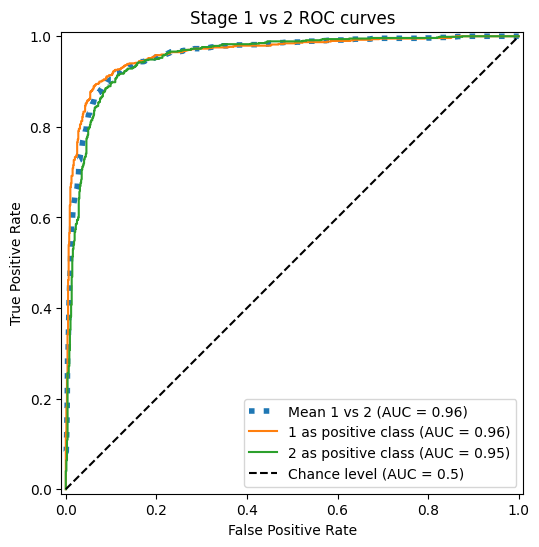

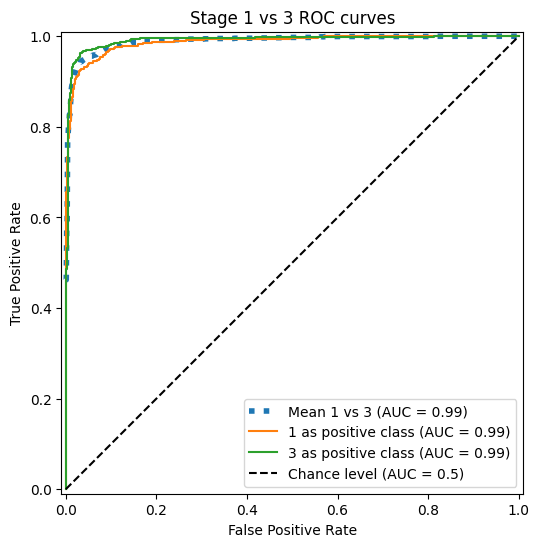

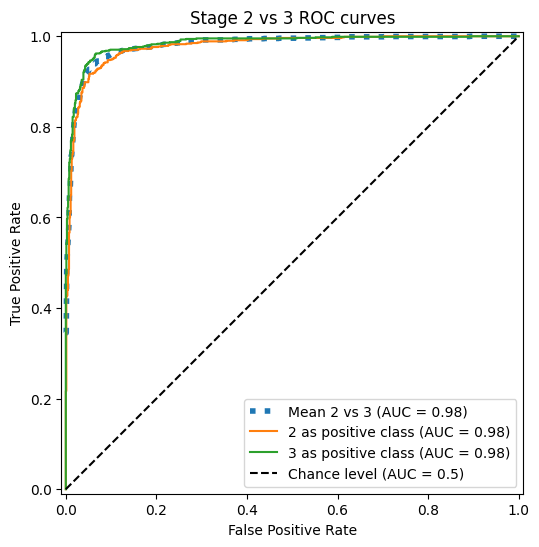

In [67]:
OvOROC(hg_probs,'Histogram based Gradient Boosting Classifier')

Histogram based Gradient Boosting Classifier yields an excellent macro averaged OvO AUROC score of 0.98, so we can say the model is an escellent model.